In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit
import ipywidgets as widgets

In [91]:
DatabaseDF = pd.read_csv("../NoNanDataset.csv")

In [92]:
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Best9 Mo BOPD,Best12 Mo BOPD,Compl. Type,Latitude,Longitude,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Year Drilled
0,35,Operator 4,Well 36,TFH,9270.0,27.0,141,100,2,1993110.0,...,53.057199,45.701841,Sleeves,47.065646,-103.319956,LINEAR GEL (HC),660.0,17.41,Sleeves,2012.0
1,36,Operator 2,Well 37,TFH,9658.0,30.0,142,99,29,2757927.0,...,58.269413,52.728468,P & P,47.088015,-103.244706,CROSSLINKED (HC),660.0,19.82,P & P,2012.0
2,40,Operator 4,Well 41,TFH,9225.0,30.0,140,100,13,2022180.0,...,398.860399,341.425597,Sleeves,46.947651,-103.242583,CROSSLINKED (HC),660.0,127.42,Sleeves,2011.0
3,46,Operator 4,Well 47,TFH,9330.0,29.0,142,101,3,1895300.0,...,65.081452,58.689459,Sleeves,47.152015,-103.467130,SLICKWATER (HC),660.0,21.52,Sleeves,2011.0
4,47,Operator 4,Well 48,TFH,9221.0,30.0,141,100,16,1808716.0,...,60.442691,51.986084,Sleeves,47.036461,-103.362784,CROSSLINKED (HC),660.0,18.95,Sleeves,2012.0


## Definition of Solow Model

The Solow Model looks at overall economic growth, while factoring different factors. For example, they take into account the population growth, technological growth, etc, that help affect the economic growth of a country. Created by Robert Solow, an economy can grow from capital, labour, ideas and new technology. 

Correlation between the different values of cumulative production will be the rate be plugged into the Solow formula to understand the change of the model. This is because many of the features must be between the value of 0 - 1 and they help establish a relationship between output, capital, and labour so our features can be used to see that relationship. 

In [95]:
spearmancorr = DatabaseDF.corr(method = 'spearman')
spearmancorr # Looking for best relationship

,Unnamed: 0,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,Best6 Mo BOPD,Best9 Mo BOPD,Best12 Mo BOPD,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,Year Drilled,Feature Capital
Unnamed: 0,1.000000,0.012622,0.148303,0.343701,0.008513,-0.077691,0.188771,0.131773,0.104705,0.113086,0.115117,0.115669,0.112843,0.348878,-0.040417,-0.091648,0.128549,0.060005,0.189544
Lateral Length,0.012622,1.000000,0.326290,-0.016932,0.137023,-0.062861,0.224907,0.206585,0.134751,0.138613,0.137870,0.137952,0.136753,-0.011756,-0.135911,-0.080283,0.144174,0.128648,0.225757
Stages,0.148303,0.326290,1.000000,0.122776,0.091109,-0.009130,0.423616,0.373821,0.190851,0.186142,0.181237,0.176790,0.171319,0.123869,-0.101466,-0.079612,0.187225,0.241088,0.426184
Township,0.343701,-0.016932,0.122776,1.000000,-0.011011,0.005409,0.022915,0.004419,-0.155647,-0.135291,-0.123578,-0.115704,-0.112508,0.997718,-0.131171,-0.013555,-0.102399,-0.059394,0.022827
Range,0.008513,0.137023,0.091109,-0.011011,1.000000,-0.051767,0.085336,0.222161,-0.178993,-0.205408,-0.222870,-0.233749,-0.241204,-0.006678,-0.983241,0.062593,-0.224877,0.127531,0.091708
Section,-0.077691,-0.062861,-0.009130,0.005409,-0.051767,1.000000,-0.034314,-0.018474,0.026274,0.023208,0.022242,0.021189,0.022128,-0.052653,0.046689,0.017290,0.022454,-0.014054,-0.034566
"Total Prop, lbs",0.188771,0.224907,0.423616,0.022915,0.085336,-0.034314,1.000000,0.760718,0.341788,0.357036,0.360981,0.358927,0.352669,0.024637,-0.087241,-0.137906,0.375574,0.274155,0.999661
"Fluid, bbls",0.131773,0.206585,0.373821,0.004419,0.222161,-0.018474,0.760718,1.000000,0.290639,0.308078,0.310167,0.306273,0.297557,0.005619,-0.225113,-0.191823,0.318886,0.343253,0.772346
Best1 Mo BOPD,0.104705,0.134751,0.190851,-0.155647,-0.178993,0.026274,0.341788,0.290639,1.000000,0.968589,0.938208,0.920603,0.907371,-0.157729,0.189309,-0.211479,0.899865,0.134452,0.341655
Best3 Mo BOPD,0.113086,0.138613,0.186142,-0.135291,-0.205408,0.023208,0.357036,0.308078,0.968589,1.000000,0.989321,0.976950,0.965363,-0.137291,0.213102,-0.214394,0.956062,0.137940,0.356894


In [94]:
DatabaseDF['Feature Capital'] = (DatabaseDF['Total Prop, lbs'] + DatabaseDF['Fluid, bbls'] + DatabaseDF['Lateral Length']) / 3

The ratio we are trying to attain is the k = 4 ratio that is commonly used within the Solow model. To change the ratio, we have to evaluate the savings rate and all the major production factors to see which one should change so the ratio is near 4. The following models are showing where the current data lies right now with a ratio of 1.55.

## Function: 
Attached the link for a better explaination. Still want to change it up but as of right now a good starting place. https://www.bradford-delong.com/2019/08/solow-growth-model-python-classnotebook.html

In [96]:
class Solow:
    
    def __init__(self, n=0.03,              # Growth of employees
                       s=0.38,              # Focus on saving production 
                       δ=0.14,              # Constant depreciation rate, decline of need 10%
                       α=0.38,              # Total Prop, bbls
                       g=0.02,              # Constant feature of productivity, growth of technology
                       κ= (0.38) / (0.03 + 0.14 + 0.02),              # current capital-labor ratio. s / (g + n + depreciation rate)
                       E=1.0,               # Constant Education
                       L=1.0):              # Constant Labour

        self.n, self.s, self.δ, self.α, self.g = n, s, δ, α, g
        self.κ, self.E, self.L = κ, E, L
        self.Y = self.κ**(self.α/(1-self.α))*self.E*self.L
        self.K = self.κ * self.Y
        self.y = self.Y/self.L
        self.α1 = 1-((1-np.exp((self.α-1)*(self.n+self.g+self.δ)))/(self.n+self.g+self.δ))
        self.initdata = vars(self).copy()
        
    def calc_next_period_kappa(self):
        "Calculate the next period capital-output ratio."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α1, g, κ= self.n, self.s, self.δ, self.α1, self.g, self.κ
        # Apply the update rule
        return (κ + (1 - α1)*( s - (n+g+δ)*κ ))

    def calc_next_period_E(self):
        "Calculate the next period efficiency of labor."
        # Unpack parameters (get rid of self to simplify notation)
        E, g = self.E, self.g
        # Apply the update rule
        return (E * np.exp(g))

    def calc_next_period_L(self):
        "Calculate the next period labor force."
        # Unpack parameters (get rid of self to simplify notation)
        n, L = self.n, self.L
        # Apply the update rule
        return (L*np.exp(n))

    def update(self):
        "Update the current state."
        self.κ =  self.calc_next_period_kappa()
        self.E =  self.calc_next_period_E()
        self.L =  self.calc_next_period_L()
        self.Y = self.κ**(self.α/(1-self.α))*self.E*self.L
        self.K = self.κ * self.Y
        self.y = self.Y/self.L

    def steady_state(self):
        "Compute the steady state value of the capital-output ratio."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, g = self.n, self.s, self.δ, self.g
        # Compute and return steady state
        return (s /(n + g + δ))

    def generate_sequence(self, t, var = 'κ', init = True):
        "Generate and return time series of selected variable. Variable is κ by default. Start from t=0 by default."
        path = []
        
        # initialize data 
        if init == True:
            for para in self.initdata:
                 setattr(self, para, self.initdata[para])

        for i in range(t):
            path.append(vars(self)[var])
            self.update()
        return path

## Explaination of Formula

**n value:** this value is in direct correlation with the concept of human capital growth. If we run under the assumption with a company will gain employees 3% each year, our n is 0.03. 

**s value:** this value is the savings rate of the capital that is used in the economy. In this case, whatever feature is to stay constant as well over time which I have put as year drilled.

**δ value:** the depreciation rate of the capital. This could be any feature that does decrease over time, a capital that decreases over time. I decided to use lateral length because we are looking at limiting resource. 

**α value:** this value is the share of capital. I made this the feature that had the strongest relation used with the 12 month cumulative production. 

**g value:** this is the value is the productivity of an economy, usually with technology. I left this as a constant as well due to previous Solow models. However, more research for the other features that can be implemented for productivity. 

**κ value:** ratio of capital-labor, taking ratio as well. 

**E and L values:** education and labor in economy, remain constant

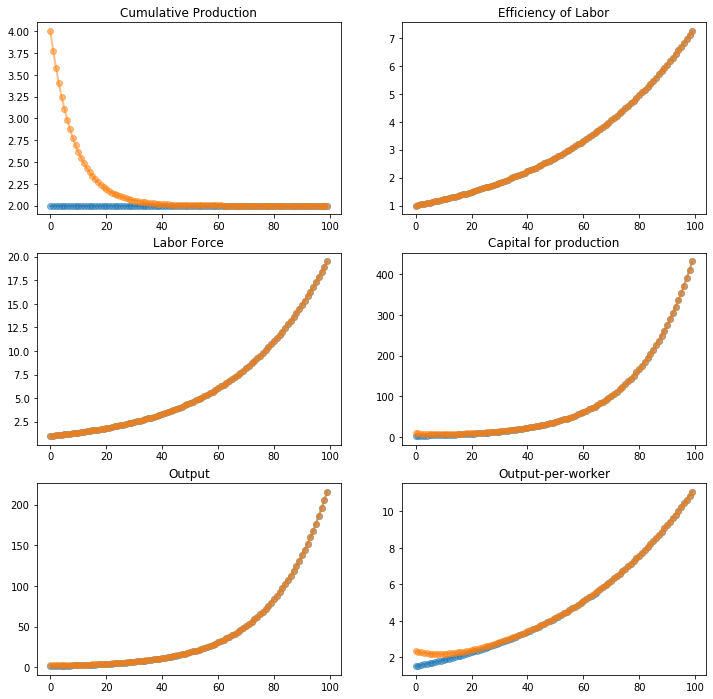

In [97]:
T = 100

s_base = Solow(κ= (0.38) / (0.03 + 0.14 + 0.02))
s_base.scenario = "base scenario"
s_alt = Solow(κ=4)
s_alt.scenario = "alt scenario"

figcontents = {
        (0,0):('κ','Cumulative Production'),
        (0,1):('E','Efficiency of Labor'),
        (1,0):('L','Labor Force'),
        (1,1):('K','Capital for production'),
        (2,0):('Y','Output'),
        (2,1):('y','Output-per-worker')
       }

num_rows, num_cols = 3,2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
for i in range(num_rows):
    for j in range(num_cols):
        for s in s_base, s_alt:
            lb = f'{s.scenario}: initial κ = {s.initdata["κ"]}'
            axes[i,j].plot(s.generate_sequence(T, var = figcontents[i,j][0]),'o-', lw=2, alpha=0.5, label=lb)
            axes[i,j].set(title=figcontents[i,j][1])

#   global legend '''

In [98]:
(0.38) / (0.03 + 0.14 + 0.02)

2.0

There needs to be more of an understanding on each of the features for the variables. However, each of the graphs take two base features and compare the variables to the cumulative factor production. The 2nd graph is Total proppant and fluid, while the 3rd graph is taking all the fetures like total propp, fluid, lateral length, etc that were put into the formula for comparison.

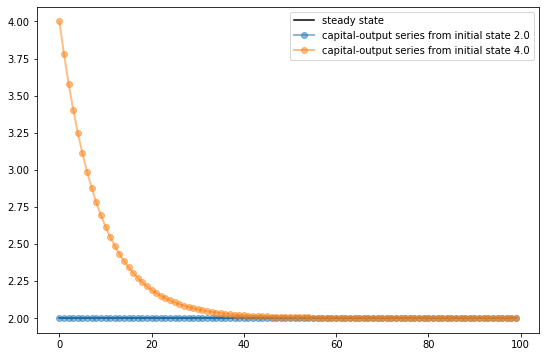

In [99]:
T = 100

s_base = Solow(κ=2.0)
s_alt = Solow(κ=4.0)

fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady-state value of the capital-output ratio
ax.plot([s_base.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s_base, s_alt:
    lb = f'capital-output series from initial state {s.initdata["κ"]}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.5, label=lb)
    

ax.legend()
plt.show()

This part of the model calculates how we have the intial ratio of 1.63 compared to any different ratios of the capital-labour, based on cumulative production. 

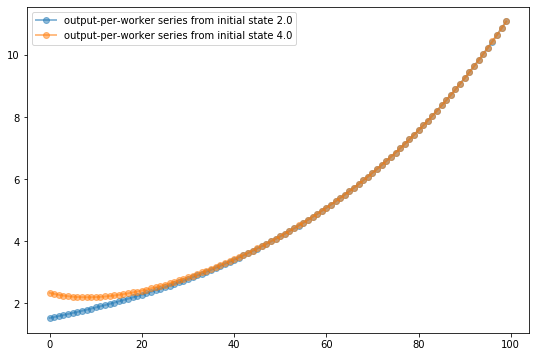

In [100]:
fig, ax = plt.subplots(figsize=(9, 6))

for s in s_base, s_alt:
    lb = f'output-per-worker series from initial state {s.initdata["κ"]}'
    ax.plot(s.generate_sequence(T, var = 'y'), 'o-', lw=2, alpha=0.5, label=lb)
ax.legend()


plt.show()

This looks at human capital and the production of oil(cumulative production) versus a given ratio for comparison. 

The following looks at the constant features in the ratio equation to see what needs to be changed to get the ratio of 4.

In [101]:
# equation is ratio = s / (g + n + dep_rate)

sav_rate = 4 * (0.14 + 0.03 + 0.02)
dep_rate = ((0.38) / 4) - (0.02 + 0.03)
prod_rate = ((0.38) / 4) - (0.03 + 0.14)
pop_rate = ((0.38) / 4) - (0.14 + 0.02)
print('Here is the savings rate if the rest of the feature is constant:', sav_rate)
print('Here is the depreciation rate if the rest of the feature is constant:', dep_rate)
print('Here is the productivity rate if the rest of the feature is constant:', prod_rate)
print('Here is the population rate if the rest of the feature is constant:', pop_rate)

Here is the savings rate if the rest of the feature is constant: 0.76
Here is the depreciation rate if the rest of the feature is constant: 0.045
Here is the productivity rate if the rest of the feature is constant: -0.07500000000000001
Here is the population rate if the rest of the feature is constant: -0.065


### What does this mean:
This means that if we want to keep our rates constant then we need to change the relationship between cumulative production and these other factors. Most likely, rate for productivity and population will remain the same. How do we work with savings rate and depreciation rate to get near the ratio of four?

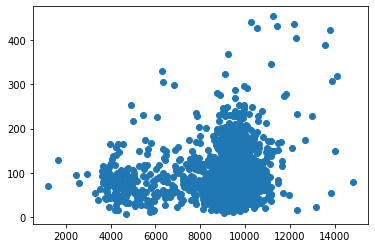

In [102]:
# Change depreciation rate of Lateral Length to have it be more varied 
plt.scatter(DatabaseDF['Lateral Length'], DatabaseDF['12 month Cum Prod'])

This graph shows that varying lateral length to be more digging deep, to decrease rate to 0.05. 

### Application of Depreciation Rate change

In [103]:
class Solow:
    
    def __init__(self, n=0.03,              # Growth of employees
                       s=0.38,              # Focus on saving production 
                       δ=0.05,              # Constant depreciation rate, decline of need 10%
                       α=0.38,              # Total Prop, bbls
                       g=0.02,              # Constant feature of productivity, growth of technology
                       κ= (0.31) / (0.03 + 0.17 + 0.02),              # current capital-labor ratio. s / (g + n + depreciation rate)
                       E=1.0,               # Constant Education
                       L=1.0):              # Constant Labour

        self.n, self.s, self.δ, self.α, self.g = n, s, δ, α, g
        self.κ, self.E, self.L = κ, E, L
        self.Y = self.κ**(self.α/(1-self.α))*self.E*self.L
        self.K = self.κ * self.Y
        self.y = self.Y/self.L
        self.α1 = 1-((1-np.exp((self.α-1)*(self.n+self.g+self.δ)))/(self.n+self.g+self.δ))
        self.initdata = vars(self).copy()
        
    def calc_next_period_kappa(self):
        "Calculate the next period capital-output ratio."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α1, g, κ= self.n, self.s, self.δ, self.α1, self.g, self.κ
        # Apply the update rule
        return (κ + (1 - α1)*( s - (n+g+δ)*κ ))

    def calc_next_period_E(self):
        "Calculate the next period efficiency of labor."
        # Unpack parameters (get rid of self to simplify notation)
        E, g = self.E, self.g
        # Apply the update rule
        return (E * np.exp(g))

    def calc_next_period_L(self):
        "Calculate the next period labor force."
        # Unpack parameters (get rid of self to simplify notation)
        n, L = self.n, self.L
        # Apply the update rule
        return (L*np.exp(n))

    def update(self):
        "Update the current state."
        self.κ =  self.calc_next_period_kappa()
        self.E =  self.calc_next_period_E()
        self.L =  self.calc_next_period_L()
        self.Y = self.κ**(self.α/(1-self.α))*self.E*self.L
        self.K = self.κ * self.Y
        self.y = self.Y/self.L

    def steady_state(self):
        "Compute the steady state value of the capital-output ratio."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, g = self.n, self.s, self.δ, self.g
        # Compute and return steady state
        return (s /(n + g + δ))

    def generate_sequence(self, t, var = 'κ', init = True):
        "Generate and return time series of selected variable. Variable is κ by default. Start from t=0 by default."
        path = []
        
        # initialize data 
        if init == True:
            for para in self.initdata:
                 setattr(self, para, self.initdata[para])

        for i in range(t):
            path.append(vars(self)[var])
            self.update()
        return path

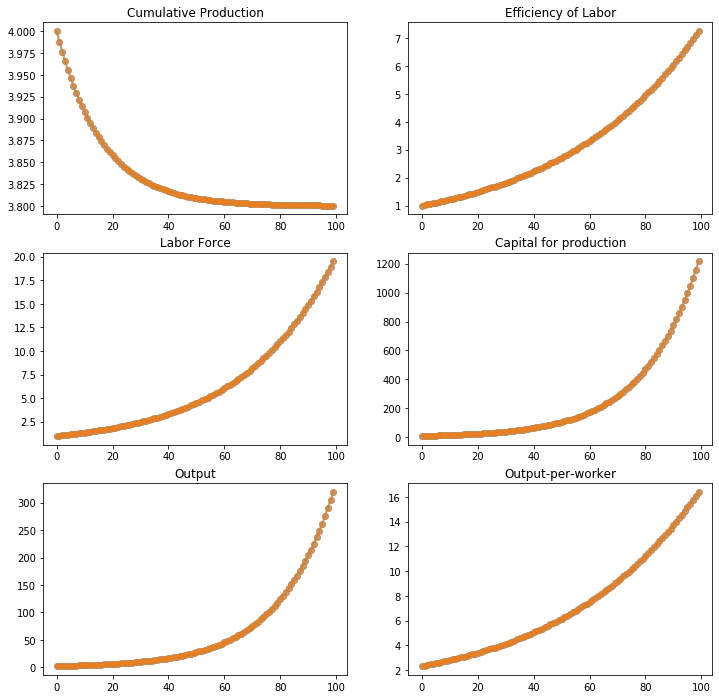

In [107]:
T = 100

s_base = Solow(κ= (0.38) / (0.03 + 0.045 + 0.02))
s_base.scenario = "base scenario"
s_alt = Solow(κ=4)
s_alt.scenario = "alt scenario"

figcontents = {
        (0,0):('κ','Cumulative Production'),
        (0,1):('E','Efficiency of Labor'),
        (1,0):('L','Labor Force'),
        (1,1):('K','Capital for production'),
        (2,0):('Y','Output'),
        (2,1):('y','Output-per-worker')
       }

num_rows, num_cols = 3,2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
for i in range(num_rows):
    for j in range(num_cols):
        for s in s_base, s_alt:
            lb = f'{s.scenario}: initial κ = {s.initdata["κ"]}'
            axes[i,j].plot(s.generate_sequence(T, var = figcontents[i,j][0]),'o-', lw=2, alpha=0.5, label=lb)
            axes[i,j].set(title=figcontents[i,j][1])

#   global legend '''

## Definition of Ramsey-Cass Model

"households to make optimal consumption/saving decisions at the microeconomic level, given the environment
they are facing. As a result, the evolution of the capital stock will reflect the interactions between
utility-maximizing households (supplying savings) and profit-maximizing firms (demanding
investment). In this model, the saving rate may not be constant anymore."

In [109]:
@njit
def u(c, γ):
    '''
    Utility function
    ASIDE: If you have a utility function that is hard to solve by hand
    you can use automatic or symbolic  differentiation
    See https://github.com/HIPS/autograd
    '''
    if γ == 1:
        # If γ = 1 we can show via L'hopital's Rule that the utility
        # becomes log
        return np.log(c)
    else:
        return c**(1 - γ) / (1 - γ)

@njit
def u_prime(c, γ):
    '''Derivative of utility'''
    if γ == 1:
        return 1 / c
    else:
        return c**(-γ)

@njit
def u_prime_inv(c, γ):
    '''Inverse utility'''
    if γ == 1:
        return c
    else:
        return c**(-1 / γ)

@njit
def f(A, k, α):
    '''Production function'''
    return A * k**α

@njit
def f_prime(A, k, α):
    '''Derivative of production function'''
    return α * A * k**(α - 1)

@njit
def f_prime_inv(A, k, α):
    return (k / (A * α))**(1 / (α - 1))@njit
def u(c, γ):
    '''
    Utility function
    ASIDE: If you have a utility function that is hard to solve by hand
    you can use automatic or symbolic  differentiation
    See https://github.com/HIPS/autograd
    '''
    if γ == 1:
        # If γ = 1 we can show via L'hopital's Rule that the utility
        # becomes log
        return np.log(c)
    else:
        return c**(1 - γ) / (1 - γ)

@njit
def u_prime(c, γ):
    '''Derivative of utility'''
    if γ == 1:
        return 1 / c
    else:
        return c**(-γ)

@njit
def u_prime_inv(c, γ):
    '''Inverse utility'''
    if γ == 1:
        return c
    else:
        return c**(-1 / γ)

@njit
def f(A, k, α):
    '''Production function'''
    return A * k**α

@njit
def f_prime(A, k, α):
    '''Derivative of production function'''
    return α * A * k**(α - 1)

@njit
def f_prime_inv(A, k, α):
    return (k / (A * α))**(1 / (α - 1))

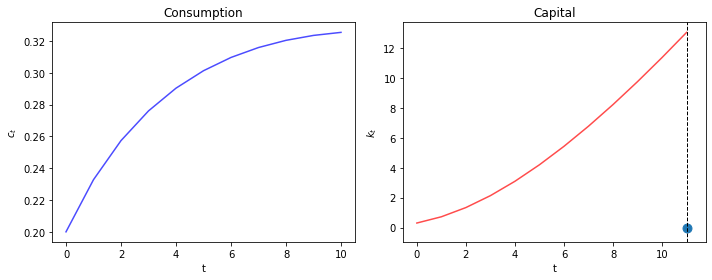

In [111]:
# Parameters
γ = 2.2 * 1 *  (1 / (1+0.07)**(0.38))                    # Took ratio of All factors of production to the feature that influences the production the most
δ = 0.045                    # Depreciation rate used in Solow model
β = (1 / (1+0.07)**(0.38))  # calculation of discount factor
α = 0.38                    # capital used in solow model
A = 1                       # Assume all technology works

# Initial guesses
T = 10
c = np.zeros(T+1)  # T periods of consumption initialized to 0
# T periods of capital initialized to 0 (T+2 to include t+1 variable as well)
k = np.zeros(T+2)
k[0] = 0.3  # Initial k
c[0] = 0.2 # Guess of c_0

@njit
def shooting_method(c, # Initial consumption
                    k,   # Initial capital
                    γ,   # Coefficient of relative risk aversion
                    δ,   # Depreciation rate on capital# Depreciation rate
                    β,   # Discount factor
                    α,   # Return to capital per capita
                    A):  # Technology

    T = len(c) - 1

    for t in range(T):
        # Equation 1 with inequality
        k[t+1] = f(A=A, k=k[t], α=α) + (1 - δ) * k[t] - c[t]
        if k[t+1] < 0:   # Ensure nonnegativity
            k[t+1] = 0

      # Equation 2: We keep in the general form to show how we would
      # solve if we didn't want to do any simplification

        if β * (f_prime(A=A, k=k[t+1], α=α) + (1 - δ)) == np.inf:
            # This only occurs if k[t+1] is 0, in which case, we won't
            # produce anything next period, so consumption will have to be 0
            c[t+1] = 0
        else:
            c[t+1] = u_prime_inv(u_prime(c=c[t], γ=γ) \
            / (β * (f_prime(A=A, k=k[t+1], α=α) + (1 - δ))), γ=γ)

    # Terminal condition calculation
    k[T+1] = f(A=A, k=k[T], α=α) + (1 - δ) * k[T] - c[T]

    return c, k

paths = shooting_method(c, k, γ, δ, β, α, A)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
colors = ['blue', 'red']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

for path, color, title, y, ax in zip(paths, colors, titles, ylabels, axes):
    ax.plot(path, c=color, alpha=0.7)
    ax.set(title=title, ylabel=y, xlabel='t')

ax.scatter(T+1, 0, s=80)
ax.axvline(T+1, color='k', ls='--', lw=1)

plt.tight_layout()
plt.show()

In [112]:
@njit
def bisection_method(c,
                     k,
                     γ,              # Coefficient of relative risk aversion
                     δ,              # Depreciation rate
                     β,              # Discount factor
                     α,              # Return to capital per capita
                     A,              # Technology
                     tol=1e-4,
                     max_iter=1e4,
                     terminal=0):    # Value we are shooting towards

    T = len(c) - 1
    i = 1                            # Initial iteration
    c_high = f(k=k[0], α=α, A=A)     # Initial high value of c
    c_low = 0                        # Initial low value of c

    path_c, path_k = shooting_method(c, k, γ, δ, β, α, A)

    while (np.abs((path_k[T+1] - terminal)) > tol or path_k[T] == terminal) \
        and i < max_iter:

        if path_k[T+1] - terminal > tol:
            # If assets are too high the c[0] we chose is now a lower bound
            # on possible values of c[0]
            c_low = c[0]
        elif path_k[T+1] - terminal < -tol:
            # If assets fell too quickly, the c[0] we chose is now an upper
            # bound on possible values of c[0]
            c_high=c[0]
        elif path_k[T] == terminal:
            # If assets fell  too quickly, the c[0] we chose is now an upper
            # bound on possible values of c[0]
            c_high=c[0]

        c[0] = (c_high + c_low) / 2  # This is the bisection part
        path_c, path_k = shooting_method(c, k, γ, δ, β, α, A)
        i += 1

    if np.abs(path_k[T+1] - terminal) < tol and path_k[T] != terminal:
        print('Converged successfully on iteration', i-1)
    else:
        print('Failed to converge and hit maximum iteration')

    μ = u_prime(c=path_c, γ=γ)
    return path_c, path_k, μ

Converged successfully on iteration 18


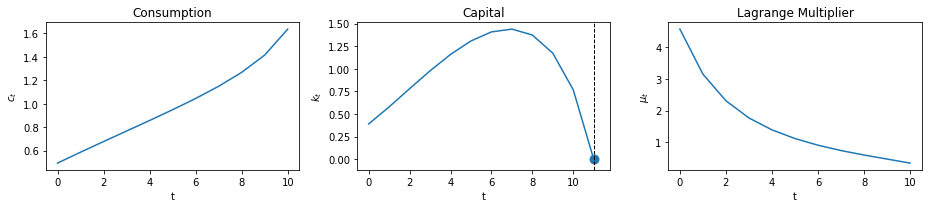

In [113]:
 c = np.zeros(T+1) # T periods of consumption initialized to 0
# T periods of capital initialized to 0. T+2 to include t+1 variable as well
k = np.zeros(T+2)

k[0] = 0.39 # initial k
c[0] = 0.32 # our guess of c_0

paths = bisection_method(c, k, γ, δ, β, α, A)

def plot_paths(paths, axes=None, ss=None):

    T = len(paths[0])

    if axes is None:
        fix, axes = plt.subplots(1, 3, figsize=(13, 3))

    ylabels = ['$c_t$', '$k_t$', '$\mu_t$']
    titles = ['Consumption', 'Capital', 'Lagrange Multiplier']

    for path, y, title, ax in zip(paths, ylabels, titles, axes):
        ax.plot(path)
        ax.set(ylabel=y, title=title, xlabel='t')

    # Plot steady state value of capital
    if ss is not None:
        axes[1].axhline(ss, c='k', ls='--', lw=1)

    axes[1].axvline(T, c='k', ls='--', lw=1)
    axes[1].scatter(T, paths[1][-1], s=80)
    plt.tight_layout()

plot_paths(paths)

In [114]:
ρ = 1 / β - 1
k_ss = f_prime_inv(k=ρ+δ, A=A, α=α)

print(f'steady state for capital is: {k_ss}')

steady state for capital is: 14.948934666496172


Converged successfully on iteration 31


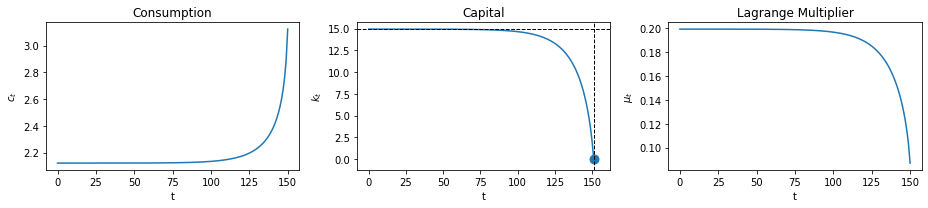

In [115]:
T = 150
c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_ss  # Start at steady state
paths = bisection_method(c, k, γ, δ, β, α, A)

plot_paths(paths, ss=k_ss)

Converged successfully on iteration 34


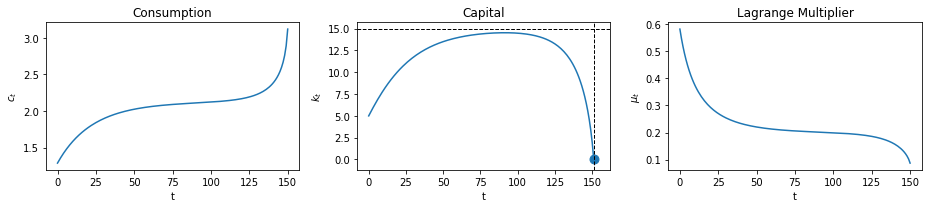

In [116]:
k_init = k_ss / 3   # Below our steady state
T = 150
c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_init
paths = bisection_method(c, k, γ, δ, β, α, A)

plot_paths(paths, ss=k_ss)

Converged successfully on iteration 34
Converged successfully on iteration 28
Converged successfully on iteration 24
Converged successfully on iteration 22


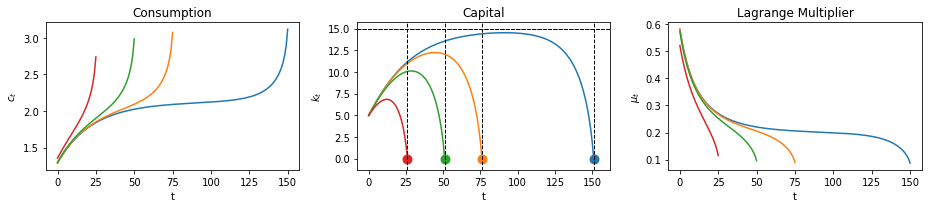

In [117]:
T_list = (150, 75, 50, 25)

fix, axes = plt.subplots(1, 3, figsize=(13, 3))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_init
    paths = bisection_method(c, k, γ, δ, β, α, A)
    plot_paths(paths, ss=k_ss, axes=axes)
